# Assignment 9 - SVM Classifier

**Q1 : SVM Classifier - 
Implement SVM Classifier on the given dataset using in-built 
function.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,r2_score
import seaborn as sns
import csv

In [ ]:
#Create a csv file
fields = ["Index","Weight","Size","Class"]
rows = [[0,69,4.39,"orange"],
        [1,69,4.21,"orange"],
        [2,65,4.09,"orange"],
        [3,72,5.85,"apple"],
        [4,67,4.7,"orange"],
        [5,73,5.68,"apple"],
        [6,70,5.56,"apple"],
        [7,75,5.11,"apple"],
        [8,74,5.36,"apple"],
        [9,65,4.27,"orange"],
        [10,73,5.79,"apple"],
        [11,70,5.47,"apple"],
        [12,74,5.53,"apple"],
        [13,68,4.47,"orange"],
        [14,74,5.22,"apple"]]

with open("data.csv",'w') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerow(fields)
  csvwriter.writerows(rows)



In [ ]:
df = pd.read_csv("/content/data.csv")
df

,Index,Weight,Size,Class
0,0,69,4.39,orange
1,1,69,4.21,orange
2,2,65,4.09,orange
3,3,72,5.85,apple
4,4,67,4.70,orange
5,5,73,5.68,apple
6,6,70,5.56,apple
7,7,75,5.11,apple
8,8,74,5.36,apple
9,9,65,4.27,orange


In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 2)
y_test

11     apple
4     orange
5      apple
0     orange
9     orange
Name: Class, dtype: object

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc_classifier.predict(x_test)
y_pred

array(['apple', 'orange', 'apple', 'orange', 'orange'], dtype=object)

**Q2 : Performance Evaluation of the Classifier :
Evaluate the performance of the classifier using metrics library based on the parameters like confusion matrix, accuracy, precision, recall, F-1 Score, TPR, TNR, FPR and FNR.**

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2 0]
 [0 3]]


In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0
y_test=np.array(y_test).reshape(-1,1)
for i in range(len(y_pred)):
    if(y_test[i]==1 and y_pred[i]==1):
        TP=TP+1
    if(y_test[i]==1 and y_pred[i]==0):
        FN=FN+1
    if(y_test[i]==0 and y_pred[i]==1):
        FP=FP+1
    if(y_test[i]==0 and y_pred[i]==0):
        TN=TN+1
print(TP,TN,FP,FN)

0 0 0 0


In [ ]:
#accuracy of testing sample
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#recall of testing sample
recall_score(y_test,y_pred,average='macro')

1.0

In [ ]:
#f1_score of testing sample
f1_score(y_test,y_pred,average='macro')

1.0

In [ ]:
#precision of testing sample
precision_score(y_test,y_pred,average='macro')

1.0

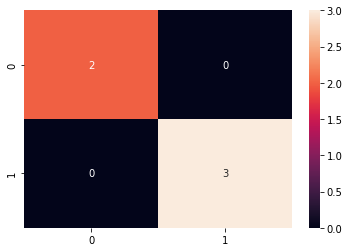

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)